In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from scipy import optimize
from IPython.core.debugger import Tracer
%matplotlib inline

In [2]:
highPerturbation = pd.read_csv('./highp_finalresults.csv')#, index_col=0)
lowPerturbation = pd.read_csv('./lowp_finalresults.csv')#, index_col=0)

## Primero se realiza un análisis individual de cada sistema para extraer la información

In [3]:
columns=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas',\
        'num_planets','mass_planets','mass_efficiency']

#High Perturbation System Analysis
Num_systh = highPerturbation['ident'].values[-1]+1
highp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systh):
    Current_syst = highPerturbation[highPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:11]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    highp_vars.loc[i]=row_vals
    
    
#Low Perturbation System Analysis
Num_systl = lowPerturbation['ident'].values[-1]+1
lowp_vars = pd.DataFrame(columns=columns)
for i in range(Num_systl):
    Current_syst = lowPerturbation[lowPerturbation['ident'].values==i]
    planets=np.shape(Current_syst)[0]
    
    if(planets>0):
        initials=Current_syst[columns[:11]].values[0]
        planets=np.shape(Current_syst)[0]
        row_vals=np.append(initials,planets)

        planet_mass=np.sum(Current_syst['emepla(i)/emet'].values)
        row_vals=np.append(row_vals,planet_mass)

        eff=planet_mass/Current_syst['emed'].values[0]
        row_vals=np.append(row_vals,eff)
    else:
        row_vals=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    
    lowp_vars.loc[i]=row_vals

In [4]:
highp_vars.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.000,11.0,8.136583,62.589101
1,2.095099e+32,40.040195,3.201758,16.765976,0.019,1.0,0.3,1.0,0.1,-0.092791,3525593.500,13.0,2.827470,148.814199
2,5.354890e+32,40.647163,1.965345,67.644768,0.079,1.0,0.3,1.0,0.1,0.514770,9390406.000,9.0,7.979543,101.006870
3,3.614768e+32,29.539343,9.568532,16.213096,0.010,1.0,0.3,1.0,0.1,0.328146,1644710.625,18.0,6.944855,694.485525
4,2.885875e+32,61.195038,2.230675,15.866622,0.042,1.0,0.3,1.0,0.1,-0.220031,9468353.000,10.0,3.193649,76.039252


In [5]:
lowp_vars.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,num_planets,mass_planets,mass_efficiency
0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.1,1.0,0.1,0.077070,9268935.000,12.0,6.705383,51.579871
1,2.095099e+32,40.040195,3.201758,16.765976,0.019,1.0,0.1,1.0,0.1,-0.092791,3525593.500,8.0,2.725320,143.437891
2,5.354890e+32,40.647163,1.965345,67.644768,0.079,1.0,0.1,1.0,0.1,0.514770,9390406.000,12.0,10.749995,136.075885
3,3.614768e+32,29.539343,9.568532,16.213096,0.010,1.0,0.1,1.0,0.1,0.328146,1644710.625,23.0,6.397114,639.711381
4,2.885875e+32,61.195038,2.230675,15.866622,0.042,1.0,0.1,1.0,0.1,-0.220031,9468353.000,10.0,2.953130,70.312617


In [6]:
columns1=['emestar','rc','qest','sigmag_0','emed','gama','apert','fpert','constmigI','emetal','taugas']
columns2=['num_planets','mass_planets','mass_efficiency']

hn = pd.DataFrame(columns=columns1)
ln = pd.DataFrame(columns=columns1)

rhn = pd.DataFrame(columns=columns2)
rln = pd.DataFrame(columns=columns2)


In [7]:
for i in range(len(columns1)):
    hn[columns1[i]]=highp_vars[columns1[i]]/max(highp_vars[columns1[i]])
    ln[columns1[i]]=lowp_vars[columns1[i]]/max(lowp_vars[columns1[i]])
for i in range(len(columns2)):
    rhn[columns2[i]]=highp_vars[columns2[i]]/max(highp_vars[columns2[i]])
    rln[columns2[i]]=lowp_vars[columns2[i]]/max(lowp_vars[columns2[i]])

In [8]:
hn.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0.364556,0.656938,0.023033,0.137702,0.406250,1.0,1.0,1.0,1.0,0.099482,0.928252
1,0.174851,0.439260,0.066394,0.045015,0.059375,1.0,1.0,1.0,1.0,-0.119776,0.353076
2,0.446904,0.445918,0.040755,0.181619,0.246875,1.0,1.0,1.0,1.0,0.664468,0.940417
3,0.301679,0.324060,0.198421,0.043530,0.031250,1.0,1.0,1.0,1.0,0.423572,0.164712
4,0.240847,0.671338,0.046257,0.042600,0.131250,1.0,1.0,1.0,1.0,-0.284017,0.948223


In [9]:
ln.head()

,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0.364556,0.656938,0.023033,0.137702,0.406250,1.0,1.0,1.0,1.0,0.099482,0.928252
1,0.174851,0.439260,0.066394,0.045015,0.059375,1.0,1.0,1.0,1.0,-0.119776,0.353076
2,0.446904,0.445918,0.040755,0.181619,0.246875,1.0,1.0,1.0,1.0,0.664468,0.940417
3,0.301679,0.324060,0.198421,0.043530,0.031250,1.0,1.0,1.0,1.0,0.423572,0.164712
4,0.240847,0.671338,0.046257,0.042600,0.131250,1.0,1.0,1.0,1.0,-0.284017,0.948223


# Definamos mi red neuronal y como se enetrena

In [10]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = len(columns1)
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        #Tracer()()
        self.yHat = self.forward(X) 
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1,dJdW2
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.

        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [11]:
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))
        self.testJ.append(self.N.costFunction(self.testX, self.testY))
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, trainX, trainY, testX, testY):
        #Make an internal variable for the callback function:
        self.X = trainX
        self.y = trainY
        
        self.testX = testX
        self.testY = testY

        #Make empty list to store training costs:
        self.J = []
        self.testJ = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', \
                                 args=(trainX, trainY), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res


## High variation 

## Preparamos los datos para entrenar

In [152]:
X_train, X_test, Y_train, Y_test = train_test_split(hn, rhn, random_state=1)

In [153]:
x_train= X_train.as_matrix()
x_test = X_test.as_matrix()
y_train= Y_train.as_matrix()
y_test = Y_test.as_matrix()

In [14]:
Y_train.head()

,num_planets,mass_planets,mass_efficiency
2909,0.538462,0.000219,0.002427
1994,0.423077,0.086385,0.296126
635,0.346154,0.000091,0.003384
720,0.000000,0.000000,0.000000
254,0.653846,0.000177,0.001963


# Numero de planetas

In [150]:
NN=Neural_Network()
T=trainer(NN)

In [22]:
T.train(x_train,np.transpose(y_train[:,0]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,0]).reshape(len(y_test),1))

         Current function value: 8.395555
         Iterations: 200
         Function evaluations: 231
         Gradient evaluations: 231


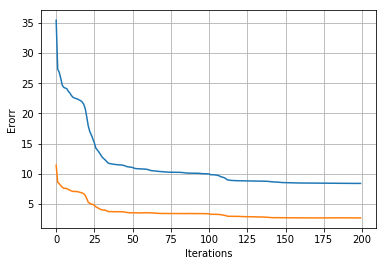

In [23]:
#Plot cost during training:
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Erorr')
#plt.savefig('error-costop.png')

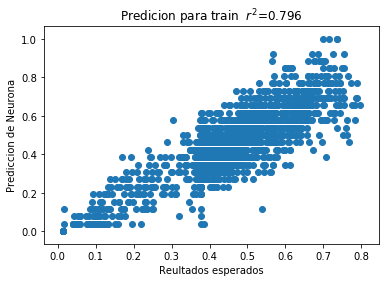

In [24]:
plt.scatter(NN.forward(x_train),y_train[:,0])
r=r2_score(y_train[:,0],NN.forward(x_train))
plt.ylabel('Prediccion de Neurona')
plt.xlabel('Reultados esperados')
plt.title('Predicion para train  $r^2$=%.3f'%r)
#plt.savefig('trainh.png')

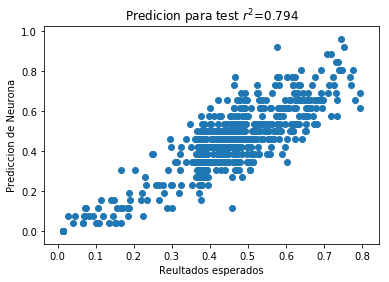

In [25]:
plt.scatter(NN.forward(x_test),y_test[:,0])
r=r2_score(y_test[:,0],NN.forward(x_test))
plt.ylabel('Prediccion de Neurona')
plt.xlabel('Reultados esperados')
plt.title('Predicion para test $r^2$=%.3f'%r)
#plt.savefig('testh.png')

# Masa de los planetas

In [252]:
NN1=Neural_Network()
T1=trainer(NN1)

In [253]:
T1.train(x_train,np.transpose(y_train[:,1]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,1]).reshape(len(y_test[:,1]),1))

         Current function value: 0.481433
         Iterations: 200
         Function evaluations: 243
         Gradient evaluations: 243


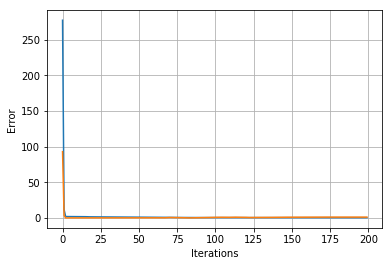

In [254]:
#Plot cost dudata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYgAAAEKCAYAAAAIO8L1AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAHthJREFUeJzt3X2UHXWd5/H35/ZD0DQiGKZPFpCEM9E5wFmjHdlhFYYeZxTZGVF2BsOOLopno3sYx/Fhleic0Z057NEZH3b3+DQ6MLA7SIMimmVBRLYDPiEkTIAEyBCejmEgKCDQPITuvt/9o6o7ldt16/a9Sd17Y31e51Ru3V89fbvuTX3v71dVv1JEYGZm1qjW6wDMzKw/OUGYmVkuJwgzM8vlBGFmZrmcIMzMLJcThJmZ5XKCMDOzXE4QZmaWywnCzMxyDfY6gH2xbNmyWLFiRcfLP/PMMyxdunT/BbSfOK72OK729Wtsjqs9nca1efPmX0bE4S1njIgDdhgbG4t9MTk5uU/Ll8Vxtcdxta9fY3Nc7ek0LmBTLOIY6yYmMzPL5QRhZma5nCDMzCyXE4SZmeUqLUFIOkrSpKQ7JW2T9IG0/DBJ10m6J309NLPMekk7JG2X9KayYjMzs9bKrEHMAB+OiGOB3wbOlXQscB5wfUSsAq5P35NOWwscB5wKfFnSQInxmZlZgdISREQ8HBG3puNPA3cBRwCnAxens10MvDUdPx2YiIjdEXE/sAM4oaz4zMysWFdulJO0Ang18DNgNCIeTic9Aoym40cAN2UW25mW7XePPPk83/jZgyx/oV7G6s3Mfi0oSn4mtaQR4Abg/Ij4tqRfRcRLM9OfiIhDJX0RuCki/jEtvwC4JiK+1bC+dcA6gNHR0bGJiYm2Y7r/yVn+60+f573HBie+fKTzP64kU1NTjIw4rsVyXO3r19gcV3s6jWt8fHxzRKxpOeNi7qbrdACGgGuBD2XKtgPL0/HlwPZ0fD2wPjPftcCJRevv9E7qO3b+Ko7+2FXx+cuu62j5sv263bVZNsfVvn6NzXG154C9k1qSgAuAuyLi85lJG4Cz0/Gzge9mytdKWiJpJbAKuLmc2JLXermVJzOzA1qZ5yBeB7wTuEPSlrTs48CngcslvQd4EDgTICK2SbocuJPkCqhzI2K2jMBqaYYouXXNzOyAVlqCiIgfAWoy+Q1NljkfOL+smObMJ4iyN2RmdgCr5J3UtTRtuQZhZtZcJROE0hqEL3I1M2uukgnCNQgzs9YqmiB8DsLMrJVqJwhXIczMmqpkgvB9EGZmrVUyQdRqbmIyM2ulmgnCJ6nNzFqqaIJwDcLMrJVKJgifgzAza62SCcI1CDOz1qqdIJwhzMyaqmiCSF6dIMzMmqtkgnBfTGZmrVUyQbgGYWbWWkUThE9Sm5m1UuYjRy+U9KikrZmyyyRtSYcH5p40J2mFpOcy075aVlzgvpjMzBajzEeOXgR8EfhfcwUR8fa5cUmfA57MzH9vRKwuMZ558/dBdGNjZmYHqDIfOXqjpBV505ScJT4T+N2ytl/El7mambXWq3MQJwG7IuKeTNnKtHnpBkknlbnx+ZPUZW7EzOwApzLb4dMaxFURcXxD+VeAHRHxufT9EmAkIh6TNAZ8BzguIp7KWec6YB3A6Ojo2MTERNtx1SM459pn+XcvD/742JG2ly/b1NQUIyOOa7EcV/v6NTbH1Z5O4xofH98cEWtazhgRpQ3ACmBrQ9kgsAs4smC5jcCaVusfGxuLTtTr9Tj6Y1fFn33t2o6WL9vk5GSvQ8jluNrTr3FF9G9sjqs9ncYFbIpFHMN70cT0e8DdEbFzrkDS4ZIG0vFjgFXAfWUFIAnJTUxmZkXKvMz1UuCnwCsl7ZT0nnTSWuDShtlPBm5PL3v9FvC+iHi8rNggOVHtk9RmZs2VeRXTWU3K35VTdgVwRVmx5Km5BmFmVqiSd1JD0szk50GYmTVX2QThGoSZWbEKJwi5qw0zswIVTxC9jsLMrH9VNkFI7ovJzKxIZROEaxBmZsUqnCB8ktrMrEiFE4RrEGZmRSqbICT5HISZWYHKJoia/DwIM7MiFU4Q8jkIM7MCFU4QrkGYmRWpbIJwX0xmZsUqmyBqNV/mamZWpLoJwn0xmZkVqnaC6HUQZmZ9rMwnyl0o6VFJWzNln5L0kKQt6XBaZtp6STskbZf0prLi2rM9fA7CzKxAmTWIi4BTc8q/EBGr0+FqAEnHkjyK9Lh0mS/PPaO6LK5BmJkVKy1BRMSNwGKfK306MBERuyPifmAHcEJZsYEvczUza0VlnqiVtAK4KiKOT99/Cng38CSwCfhwRDwh6YvATRHxj+l8FwDXRMS3cta5DlgHMDo6OjYxMdFRbH/xo2d52ZI6H3ztSEfLl2lqaoqREce1WI6rff0am+NqT6dxjY+Pb46INS1njIjSBmAFsDXzfhQYIKm5nA9cmJZ/EXhHZr4LgD9qtf6xsbHo1Kn//cZ46+eu6Xj5Mk1OTvY6hFyOqz39GldE/8bmuNrTaVzApljEMbyrVzFFxK6ImI2IOvB19jQjPQQclZn1yLSsNG5iMjMr1tUEIWl55u3bgLkrnDYAayUtkbQSWAXcXGYsPkltZlZssKwVS7oUOAVYJmkn8EngFEmrSW5ifgB4L0BEbJN0OXAnMAOcGxGzZcUGUKv5eRBmZkVKSxARcVZO8QUF859Pcl6iK2qC6W5tzMzsAFTtO6ldhTAza6rCCcKd9ZmZFalsgnB332ZmxSqbIHyZq5lZsQonCF/mamZWpNIJwk1MZmbNVTZByE1MZmaFKpsg3MRkZlaswgnCNQgzsyIVThCi3usgzMz6WGUThOS+mMzMilQ2QfhOajOzYhVOEO6LycysSHUTRA2fgzAzK1DZBOFzEGZmxUpLEJIulPSopK2Zsr+VdLek2yVdKemlafkKSc9J2pIOXy0rrjk1Jwgzs0Jl1iAuAk5tKLsOOD4i/jXwz8D6zLR7I2J1OryvxLgAn6Q2M2ultAQRETcCjzeUfT8iZtK3NwFHlrX9VtwXk5lZsV6egzgHuCbzfmXavHSDpJPK3rhcgzAzK6QyL/WUtAK4KiKObyj/BLAGOCMiQtISYCQiHpM0BnwHOC4inspZ5zpgHcDo6OjYxMRER7H9/R272fbLab4wPtLR8mWamppiZMRxLZbjal+/xua42tNpXOPj45sjYk3LGSOitAFYAWxtKHsX8FPgxQXLbQTWtFr/2NhYdOq/fHNLvPqT/7fj5cs0OTnZ6xByOa729GtcEf0bm+NqT6dxAZtiEcfwrjYxSToV+Cjwloh4NlN+uKSBdPwYYBVwX5mx+ByEmVmxwbJWLOlS4BRgmaSdwCdJrlpaAlwnCeCmSK5YOhn4K0nTJPevvS8iHs9d8f6Lz+cgzMwKlJYgIuKsnOILmsx7BXBFWbHkSbr7doowM2umsndS+0Y5M7NiFU4Q7ovJzKxIZROE+2IyMytW2QThZ1KbmRWrcILwM6nNzIpUN0HU/ExqM7MilU0Qcg3CzKxQZROEL3M1MytW4QTh3lzNzIpUOEG4LyYzsyItE4SkAUmf7UYw3eS+mMzMirVMEBExC7y+C7F0VU3Jq/tjMjPLt9jO+v5J0gbgm8Azc4UR8e1SouqCWtKbLPWAAfU4GDOzPrTYBHEQ8Bjwu5myAA7gBJG81iMYwBnCzKzRohJERLy77EC6TfM1CDcxmZnlWdRVTJKOlHSlpEfT4QpJR5YdXJnmmpicH8zM8i32Mtd/ADYA/yod/k9a1pSkC9NksjVTdpik6yTdk74empm2XtIOSdslvan9P6U92SYmMzNbaLEJ4vCI+IeImEmHi4DDWyxzEXBqQ9l5wPURsQq4Pn2PpGOBtcBx6TJfnntGdVmyJ6nNzGyhxSaIxyS9I70nYkDSO0hOWjcVETcCjc+VPh24OB2/GHhrpnwiInZHxP3ADuCERcbWEbkGYWZWaLEJ4hzgTOAR4GHgj4BOTlyPRsTD6fgjwGg6fgTw88x8O9Oy0syfg3CXrmZmuVpexZQ29ZwREW/ZnxuOiJDU9s93SeuAdQCjo6Ns3Lixo+3f++A0AD/80Y8YGe6vy1ynpqY6/rvK5Lja069xQf/G5rjaU3pcEdFyAG5ezHw5y60AtmbebweWp+PLge3p+HpgfWa+a4ETW61/bGwsOnXxT+6Poz92Vfzy6ec7XkdZJicnex1CLsfVnn6NK6J/Y3Nc7ek0LmBTLOIYvtgmph9L+qKkkyS9Zm7oIB9tAM5Ox88GvpspXytpiaSVwCrg5g7Wv2jySWozs0KLvZN6dfr6V5myYO87q/ci6VLgFGCZpJ3AJ4FPA5dLeg/wIMl5DSJim6TLgTuBGeDcSPqAKo37YjIzK7aYcxA14CsRcXk7K46Is5pMekOT+c8Hzm9nG/vCl7mamRVbTG+udeCjXYilq3yjnJlZscWeg/iBpI9IOiq9G/owSYeVGlnJ3BeTmVmxxZ6DeHv6em6mLIBj9m843TPgvpjMzAottjfXlWUH0m21tO7kGoSZWb7CJiZJH82M/3HDtP9WVlDd4JPUZmbFWp2DWJsZX98wrbEjvgOKz0GYmRVrlSDUZDzv/QHF90GYmRVrlSCiyXje+wOKm5jMzIq1Okn9KklPkdQWXpSOk74/qNTISub7IMzMihUmiIgo9aE9vTR/DsLdfZuZ5VrsjXK/dmo+SW1mVqjCCSJ5dX4wM8tX4QSRZIhZZwgzs1yVTRB+JrWZWbHKJoj5Z1I7QZiZ5ap8gvB9EGZm+Rbbm+t+I+mVwGWZomOAvwReCvwn4Bdp+ccj4uqy4pi/D8IZwswsV9cTRERsJ32EqaQB4CHgSuDdwBci4rPdiMPPpDYzK9brJqY3APdGxIPd3rD7YjIzK9brBLEWuDTz/v2Sbpd0oaRDy9xwreYahJlZEfXqF7SkYeBfgOMiYpekUeCXJJ0A/jWwPCLOyVluHbAOYHR0dGxiYqKj7d/zxCzn/+x5PrJmCccv63pLW6GpqSlGRkZ6HcYCjqs9/RoX9G9sjqs9ncY1Pj6+OSLWtJwxInoyAKcD328ybQWwtdU6xsbGolObH3w8jv7YVTF5966O11GWycnJXoeQy3G1p1/jiujf2BxXezqNC9gUizhO97KJ6SwyzUuSlmemvQ3YWubGa34mtZlZoZ60rUhaCvw+8N5M8d9IWk3SxPRAw7T9zt19m5kV60mCiIhngJc1lL2zmzH4Rjkzs2K9voqpZ9wXk5lZscomCPfFZGZWrJoJ4pE7+M1LTuTE2jY3MZmZNVHNBBF1hqZ2MsJzbmIyM2uimgliYBiAIWZcgzAza6LyCcLnIMzM8lU0QQwBMKwZNzGZmTVR0QQxV4OYpV7vcSxmZn2q4gnCNQgzs2YqmiCSJqbkHESPYzEz61MVTRBJDWLYNQgzs6aqmSBqe2oQvszVzCxfRRNEjagNMuSrmMzMmqpmggCoDfs+CDOzApVNEDEwlJ6D6HUkZmb9qbIJgoFhX+ZqZlagV0+UewB4GpgFZiJijaTDgMtInkf9AHBmRDxRWhADQwwxy27nBzOzXL2sQYxHxOqIWJO+Pw+4PiJWAden78szMMyQfA7CzKyZfmpiOh24OB2/GHhrqVubPwfhBGFmlke9+AUt6X7gSZImpr+LiK9J+lVEvDSdLuCJufcNy64D1gGMjo6OTUxMdBTD2C0f4CdPLeP6lR/jtGOGO/1TSjE1NcXIyEivw1jAcbWnX+OC/o3NcbWn07jGx8c3Z1pvmouIrg/AEenrbwC3AScDv2qY54lW6xkbG4tOzX71d+L6vzg5vjR5T8frKMvk5GSvQ8jluNrTr3FF9G9sjqs9ncYFbIpFHKt70sQUEQ+lr48CVwInALskLQdIXx8tNYiBIffFZGZWoOsJQtJSSQfPjQNvBLYCG4Cz09nOBr5baiADwwxplrpvhDAzy9WLy1xHgSuT0wwMAt+IiO9JugW4XNJ7gAeBM8sMQvP3QZS5FTOzA1fXE0RE3Ae8Kqf8MeANXQtkcMg3ypmZFeiny1y7SgPDDLsvJjOzpiqbIHATk5lZoWonCHf3bWbWVIUTxBDDzLoGYWbWRIUThJ8HYWZWpPIJwk1MZmb5KpwghnyS2sysQIUThGsQZmZFKp0gBlWH+myvIzEz60sVThBDAKg+3eNAzMz6U4UTRPIMCCcIM7N8ThBOEGZmuSqcIJImppoThJlZrgoniKQGUZt1gjAzy1PdBFHzSWozsyLVTRBuYjIzK9SLR44eJWlS0p2Stkn6QFr+KUkPSdqSDqeVGshcE5MThJlZrl48cnQG+HBE3Jo+m3qzpOvSaV+IiM92JYq5BBEvdGVzZmYHml48cvRh4OF0/GlJdwFHdDuOPU1MM13ftJnZgUC97O5a0grgRuB44EPAu4EngU0ktYwncpZZB6wDGB0dHZuYmOho24f86k5evWU9f730E5z02hM6WkdZpqamGBkZ6XUYCziu9vRrXNC/sTmu9nQa1/j4+OaIWNNyxojoyQCMAJuBM9L3o8AAyXmR84ELW61jbGwsOvbzTRGffEl86e++1Pk6SjI5OdnrEHI5rvb0a1wR/Rub42pPp3EBm2IRx+meXMUkaQi4ArgkIr4NEBG7ImI2IurA14Fyf9a7LyYzs0K9uIpJwAXAXRHx+Uz58sxsbwO2lhqIr2IyMyvUi6uYXge8E7hD0pa07OPAWZJWAwE8ALy31CjSGsRAOEGYmeXpxVVMPwKUM+nqrgaS1iAGXIMwM8tV4Tup5+6DcIIwM8tT4QQx18Tk+yDMzPJUOEG4icnMrIgThGsQZma5KpwgfBWTmVmR6iYIiWkGnCDMzJqoboIAZhh0E5OZWRNOEK5BmJnlqnaCkGsQZmbNVDpBTDPIoGsQZma5Kp0gfA7CzKy5aicIuQZhZtZMtROEaxBmZk1VOkHM+hyEmVlTlU4QvorJzKy5vksQkk6VtF3SDknnlbmtgYFBpqd385WN91KvR5mbMjM74PTiiXJNSRoAvgT8PrATuEXShoi4s4ztvWzpMEO15/nM9+7mM9+7m+GBGksGaywZqrFkcIAlQzWGajWWLhngN39jhMOWLmF4MJ0nHV48PMjIQYOMLBlk6ZJBDhqqMVirMTQgBgdqDNWEJCSoSQiQWFBWS99LMFMPpmfrC+Y3M+umvkoQwAnAjoi4D0DSBHA6UEqCiNogKw56lv956qE88MIhPD8Lz00Hu2eD56dn2T1dZ6Ze58nnpvl/dz/KU8/N8MJsvYxQFvr+NQuKammiqAnEnoQiND8teQ+1WmPi2ZNs9iSeTJLKS2ANyz8z9RwvueOH89tDYrAmBmpiQGJwIBmfK5tfliSo+W1m/hZBOm1P7Gr4+2g2LV3fQw/t5oanty1cx9z6CWoEA9QZYJYaMT9fsgE1rHfPtqPZNJT8EZm/KfuKYMeDz/HQT3ak5ZnYaprfJ8m2G/e70rAapjX8fXvvl70/38b93bj8XY/NMnzvL/fLV3VuL+8Pdz8+y0H3PbZf1rU/f1Jtf3yWF9//+H5Z1/76rXfoi4f3z4oK9FuCOAL4eeb9TuDflLWxpw9+BcseuIW3bHzz3hNUS4cBqA2k43V4UZ2IOsRckkgOLiERc+Pp/8zkkCQC5g9CSVnyPsgsMz89MTMzw+Bg8tHE/D97y20Qi7zRvedUPRB1IFDUkyiijqjPH0wVkbuFiECP7/l2R5P/ghH58TWdP7e0eP65/RdAhOARIeppEqhTo84gs8mrupTU89xfzmrrkf0c9pbdb437cG7eNUDc3rh/89e5cB3tb3vhZ5w/7Vggbmsdf9G2Fm5v3+M/CuC2xW17r/XFvsffbP8/eNjrqK1+Z9Nt7w/9liBakrQOWAcwOjrKxo0bO17X1LLT2DX6O7zssZsZmH0uOVCmw/wBNOpAnVANqM0fzBNzB1OAOpo/mkdmWjJ9z3h2mUjXn11OTE/PMDRU1kej9G/Jvs79TSLmftKT/TsTL0y/wPDQ3K+W5of1dsrV9NRP8Xqy+3Z6+gWGBwcJ1TLDAMnnlYzvXb73Z7jXf8bYe7ux98QFiTcaZozM5BdeeIGh4aH5woY5FmyLWLi+xuWSb0hkJkfD+veMK/b+27IxzsxMMzg4ND9JC5aeK28Q+fMtWG7Bx5ddZ/PzfbMz0wykP44WzJd52yzeZNqekoXbyv0VVbhOsfePtoV7OrOOvXf4gvXHIudrbs+0gw8+hF1TU/t0DGwpIvpmAE4Ers28Xw+sbzb/2NhY7IvJycl9Wr4sjqs9jqt9/Rqb42pPp3EBm2IRx+R+u4rpFmCVpJWShoG1wIYex2RmVkl91cQUETOS/hS4FhgALoyIbT0Oy8yskvoqQQBExNXA1b2Ow8ys6vqticnMzPqEE4SZmeVygjAzs1xOEGZmlssJwszMcika7+Y8gEj6BfDgPqxiGbB/OqTZvxxXexxX+/o1NsfVnk7jOjoiDm810wGdIPaVpE0RsabXcTRyXO1xXO3r19gcV3vKjstNTGZmlssJwszMclU9QXyt1wE04bja47ja16+xOa72lBpXpc9BmJlZc1WvQZiZWROVTBCSTpW0XdIOSef1MI6jJE1KulPSNkkfSMs/JekhSVvS4bQexPaApDvS7W9Kyw6TdJ2ke9LXQ3sQ1ysz+2WLpKck/Xkv9pmkCyU9KmlrpqzpPpK0Pv3ObZf0pi7H9beS7pZ0u6QrJb00LV8h6bnMfvtqWXEVxNb0s+vxPrssE9MDkrak5V3bZwXHiO58zxbz0Ihfp4GkG/F7gWOAYZIHCR7bo1iWA69Jxw8G/pnkqYufAj7S4/30ALCsoexvgPPS8fOAz/TBZ/kIcHQv9hlwMvAaYGurfZR+rrcBS4CV6XdwoItxvREYTMc/k4lrRXa+Hu2z3M+u1/usYfrngL/s9j4rOEZ05XtWxRrECcCOiLgvIl4AJoDTexFIRDwcEbem408Dd5E8l7tfnQ5cnI5fDLy1h7EAvAG4NyL25WbJjkXEjUDjk+yb7aPTgYmI2B0R9wM7SL6LXYkrIr4fETPp25uAI8vYditN9lkzPd1ncyQJOBO4tIxtFyk4RnTle1bFBHEE8PPM+530wUFZ0grg1cDP0qL3p80BF/aiKYfk4bc/kLQ5fQ44wGhEPJyOPwKM9iCurLXs/Z+21/sMmu+jfvrenQNck3m/Mm0quUHSST2KKe+z65d9dhKwKyLuyZR1fZ81HCO68j2rYoLoO5JGgCuAP4+Ip4CvkDSBrQYeJqnedtvrI2I18GbgXEknZydGUp/t2SVwSh5J+xbgm2lRP+yzvfR6H+WR9AlgBrgkLXoYeHn6WX8I+Iakl3Q5rL777Bqcxd4/RLq+z3KOEfPK/J5VMUE8BByVeX9kWtYTkoZIPvhLIuLbABGxKyJmI6IOfJ2SqtVFIuKh9PVR4Mo0hl2SlqdxLwce7XZcGW8Gbo2IXdAf+yzVbB/1/Hsn6V3AHwB/kh5USJsiHkvHN5O0Wb+im3EVfHb9sM8GgTOAy+bKur3P8o4RdOl7VsUEcQuwStLK9FfoWmBDLwJJ2zYvAO6KiM9nypdnZnsbsLVx2ZLjWirp4LlxkhOcW0n209npbGcD3+1mXA32+lXX632W0WwfbQDWSloiaSWwCri5W0FJOhX4KPCWiHg2U364pIF0/Jg0rvu6FVe63WafXU/3Wer3gLsjYudcQTf3WbNjBN36nnXjTHy/DcBpJFcD3At8oodxvJ6kang7sCUdTgP+N3BHWr4BWN7luI4huRLiNmDb3D4CXgZcD9wD/AA4rEf7bSnwGHBIpqzr+4wkQT0MTJO09b6naB8Bn0i/c9uBN3c5rh0kbdNz37OvpvP++/Qz3gLcCvxhD/ZZ08+ul/ssLb8IeF/DvF3bZwXHiK58z3wntZmZ5apiE5OZmS2CE4SZmeVygjAzs1xOEGZmlssJwszMcjlBWKVJmkpfV0j6D/t53R9veP+T/bl+s7I5QZglVgBtJYj0LtsieyWIiPi3bcZk1lNOEGaJTwMnpR2wfVDSQPoMhVvSTuTeCyDpFEk/lLQBuDMt+07aqeG2uY4NJX0aeFG6vkvSsrnaitJ1b1XyzI23Z9a9UdK3lDy74ZL0TlokfTp9JsDtkj7b9b1jldTqF5BZVZxH8kyCPwBID/RPRsRrJS0Bfizp++m8rwGOj6Q7ZYBzIuJxSS8CbpF0RUScJ+lPI+nQrdEZJB3TvQpYli5zYzrt1cBxwL8APwZeJ+kuki4ofisiQunDfszK5hqEWb43Av9RyVPEfkbStcGqdNrNmeQA8GeSbiN5zsJRmfmaeT1waSQd1O0CbgBem1n3zkg6rttC0vT1JPA8cIGkM4Bnc9Zptt85QZjlE/D+iFidDisjYq4G8cz8TNIpJB26nRgRrwL+CThoH7a7OzM+S/IUuBmSHk6/RdIb6/f2Yf1mi+YEYZZ4muSRjnOuBf5z2tUykl6R9mzb6BDgiYh4VtJvAb+dmTY9t3yDHwJvT89zHE7yuMumPW6mzwI4JCKuBj5I0jRlVjqfgzBL3A7Mpk1FFwH/g6R559b0RPEvyH/E6veA96XnCbaTNDPN+Rpwu6RbI+JPMuVXAieS9JYbwEcj4pE0weQ5GPiupINIajYf6uxPNGuPe3M1M7NcbmIyM7NcThBmZpbLCcLMzHI5QZiZWS4nCDMzy+UEYWZmuZwgzMwslxOEmZnl+v9Vmwq39ZWdRAAAAABJRU5ErkJggg==ring training:
plt.plot(T1.J)
plt.plot(T1.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Error')
#plt.savefig('error-costom.png')

In [255]:
r2_score(y_test[:,1],NN1.forward(x_test))

-6.2205277786715172

## efficiencia

In [71]:
NN2=Neural_Network()
T2=trainer(NN2)

In [72]:
T2.train(x_train,np.transpose(y_train[:,2]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,2]).reshape(len(y_test),1))

Optimization terminated successfully.
         Current function value: 3.598266
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18


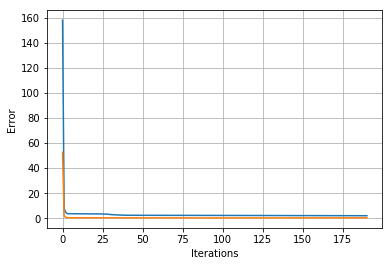

In [149]:
#Plot cost during training:
plt.plot(T2.J)
plt.plot(T2.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Error')
#plt.savefig('error-costoe.png')

In [74]:
r2_score(y_test[:,1],NN2.forward(x_test))

-0.015058805784189166

## Low variatio

In [248]:
X_train, X_test, Y_train, Y_test = train_test_split(ln, rln, random_state=1)

In [249]:
x_train= X_train.as_matrix()
x_test = X_test.as_matrix()
y_train= Y_train.as_matrix()
y_test = Y_test.as_matrix()

## numero de planetas

In [250]:
T1.train(x_train,np.transpose(y_train[:,1]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,1]).reshape(len(y_test),1))

/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in square


Optimization terminated successfully.
         Current function value: 0.933953
         Iterations: 165
         Function evaluations: 231
         Gradient evaluations: 231


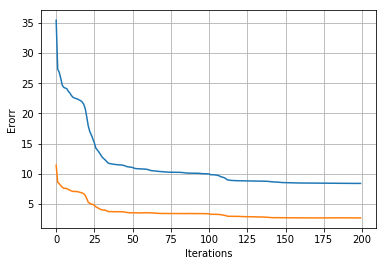

In [144]:
#Plot cost during training:
plt.plot(T.J)
plt.plot(T.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Erorr')
#plt.savefig('error-costopl.png')

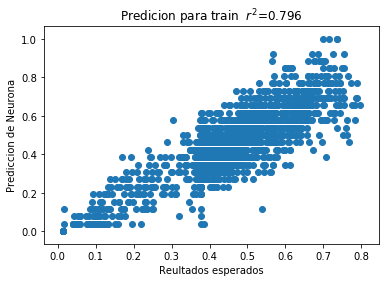

In [145]:
plt.scatter(NN.forward(x_train),y_train[:,0])
r=r2_score(y_train[:,0],NN.forward(x_train))
plt.ylabel('Prediccion de Neurona')
plt.xlabel('Reultados esperados')
plt.title('Predicion para train  $r^2$=%.3f'%r)
#plt.savefig('trainl.png')

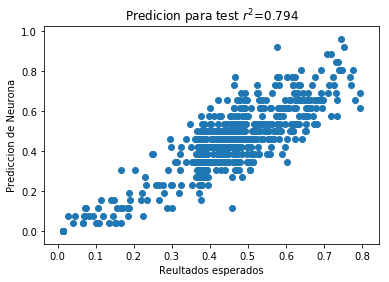

In [146]:
plt.scatter(NN.forward(x_test),y_test[:,0])
r=r2_score(y_test[:,0],NN.forward(x_test))
plt.ylabel('Prediccion de Neurona')
plt.xlabel('Reultados esperados')
plt.title('Predicion para test $r^2$=%.3f'%r)
#plt.savefig('testl.png')

## Masa de planetas

In [120]:
NN1=Neural_Network()
T1=trainer(NN1)

In [121]:
T1.train(x_train,np.transpose(y_train[:,1]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,1]).reshape(len(y_test[:,1]),1))

         Current function value: 1.025780
         Iterations: 194
         Function evaluations: 220
         Gradient evaluations: 208


/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in square
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in square
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide


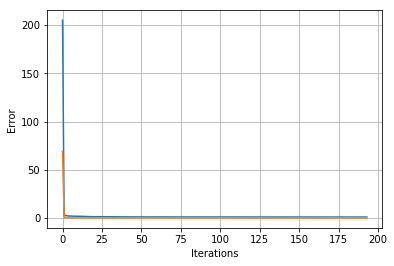

In [148]:
#Plot cost during training:
plt.plot(T1.J)
plt.plot(T1.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Error')
#plt.savefig('error-costoml.png')

In [123]:
r2_score(y_test[:,1],NN1.forward(x_test))

0.24582542488095793

## Efficiencia

In [140]:
NN2=Neural_Network()
T2=trainer(NN2)

In [141]:
T2.train(x_train,np.transpose(y_train[:,2]).reshape(len(y_train),1),x_test,np.transpose(y_test[:,2]).reshape(len(y_test),1))

         Current function value: 1.998611
         Iterations: 191
         Function evaluations: 236
         Gradient evaluations: 224


/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in square
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in exp
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: overflow encountered in square
/home/chief/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in true_divide


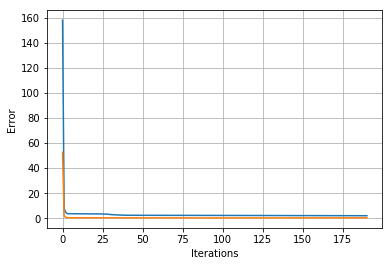

In [142]:
#Plot cost during training:
plt.plot(T2.J)
plt.plot(T2.testJ)
plt.grid(1)
plt.xlabel('Iterations')
plt.ylabel('Error')
#plt.savefig('error-costoe.png')

In [143]:
r2_score(y_test[:,1],NN2.forward(x_test))

-0.54420335831683264